In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
import keras
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support

In [2]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
test_size = 0.3
val_size = 0.5
train_size =0.7

random_state = 42

In [4]:
data = pd.read_csv('../../data/feature_sets/only_in_game_data_v1.csv')
data.head()

,blue_team_total_gold,blue_team_inhibitors,blue_team_towers,blue_team_barons,blue_team_total_kills,blue_team_ocean_drakes,blue_team_cloud_drakes,blue_team_mountain_drakes,blue_team_chemtech_drakes,blue_team_infernal_drakes,...,format,game_in_format,red_team_outcome,season_format,riot_match_id,min_start_time,month,day,year,time_in_game
0,0,0,0,0,0,0,0,0,0,0,...,2,1,0,0,111561337007371296,2024-04-14 06:00:00+00:00,4,14,2024,0.0
1,2500,0,0,0,0,0,0,0,0,0,...,2,1,0,0,111561337007371296,2024-04-14 06:00:00+00:00,4,14,2024,0.0
2,2500,0,0,0,0,0,0,0,0,0,...,2,1,0,0,111561337007371296,2024-04-14 06:00:00+00:00,4,14,2024,1.0
3,2500,0,0,0,0,0,0,0,0,0,...,2,1,0,0,111561337007371296,2024-04-14 06:00:00+00:00,4,14,2024,1.0
4,2500,0,0,0,0,0,0,0,0,0,...,2,1,0,0,111561337007371296,2024-04-14 06:00:00+00:00,4,14,2024,1.0


In [5]:
len(data)

457031

In [6]:
list(data.columns)

['blue_team_total_gold',
 'blue_team_inhibitors',
 'blue_team_towers',
 'blue_team_barons',
 'blue_team_total_kills',
 'blue_team_ocean_drakes',
 'blue_team_cloud_drakes',
 'blue_team_mountain_drakes',
 'blue_team_chemtech_drakes',
 'blue_team_infernal_drakes',
 'blue_team_hextech_drakes',
 'blue_team_elder_drakes',
 'blue_top_total_gold',
 'blue_top_level',
 'blue_top_kills',
 'blue_top_deaths',
 'blue_top_assists',
 'blue_top_creep_score',
 'blue_top_current_health',
 'blue_top_max_health',
 'blue_jungle_total_gold',
 'blue_jungle_level',
 'blue_jungle_kills',
 'blue_jungle_deaths',
 'blue_jungle_assists',
 'blue_jungle_creep_score',
 'blue_jungle_current_health',
 'blue_jungle_max_health',
 'blue_mid_total_gold',
 'blue_mid_level',
 'blue_mid_kills',
 'blue_mid_deaths',
 'blue_mid_assists',
 'blue_mid_creep_score',
 'blue_mid_current_health',
 'blue_mid_max_health',
 'blue_bot_total_gold',
 'blue_bot_level',
 'blue_bot_kills',
 'blue_bot_deaths',
 'blue_bot_assists',
 'blue_bot_cree

In [7]:
columns_to_drop = [
'riot_match_id',
'min_start_time',

'patch_version',
 'blue_team_id',
 'blue_top_player',
 'blue_jungle_player',
 'blue_mid_player',
 'blue_bot_player',
 'blue_supp_player',
 'red_team_id',
 'red_top_player',
 'red_jungle_player',
 'red_mid_player',
 'red_bot_player',
 'red_supp_player',
 'league',
 'format',
 'game_in_format',
 'season_format',
 'month',
 'day',
 'year'
 ]

In [8]:
extar_info = data[columns_to_drop]
data.drop(columns=columns_to_drop,inplace=True)


In [9]:
pred = data.pop('red_team_outcome')

In [10]:
x_train, x_temp, y_train, y_temp = train_test_split(data,pred,test_size=test_size,random_state = random_state)
x_val, x_test, y_val, y_test = train_test_split(x_temp,y_temp,test_size = val_size,random_state = random_state)

In [11]:
assert len(data) == len(x_train) + len(x_test) + len(x_val)
assert len(data) == len(y_train) + len(y_val) + len(y_test)

In [12]:
num_input = len(data.columns)
num_input

115

In [13]:
model = Sequential()
model.add(Dense(1024, input_shape=(num_input,), activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(8192, activation='relu'))
model.add(Dense(8192, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(4096, activation='leaky_relu'))
model.add(Dropout(0.1))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [14]:
patience = 10
learning_rate = 1e-6
epochs = 100
batch_szie= 256

In [15]:
earlyStopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, verbose=0, mode='min')
mcp_save = keras.callbacks.ModelCheckpoint('mdl_wts.keras', save_best_only=True, monitor='val_loss', mode='min')
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])

In [16]:
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_szie,verbose=True, validation_data=(x_val, y_val))

Epoch 1/100
1250/1250 [==============================] - 70s 54ms/step - loss: 7.5223 - accuracy: 0.6253 - val_loss: 1.2311 - val_accuracy: 0.6980
Epoch 2/100
1250/1250 [==============================] - 68s 55ms/step - loss: 2.5728 - accuracy: 0.6518 - val_loss: 0.7288 - val_accuracy: 0.7300
Epoch 3/100
1250/1250 [==============================] - 69s 55ms/step - loss: 1.5672 - accuracy: 0.6617 - val_loss: 0.5677 - val_accuracy: 0.7268
Epoch 4/100
1250/1250 [==============================] - 69s 55ms/step - loss: 1.1097 - accuracy: 0.6689 - val_loss: 0.5411 - val_accuracy: 0.7440
Epoch 5/100
1250/1250 [==============================] - 69s 55ms/step - loss: 0.8738 - accuracy: 0.6765 - val_loss: 0.5210 - val_accuracy: 0.7384
Epoch 6/100
1250/1250 [==============================] - 69s 55ms/step - loss: 0.7269 - accuracy: 0.6854 - val_loss: 0.4988 - val_accuracy: 0.7453
Epoch 7/100
1250/1250 [==============================] - 69s 55ms/step - loss: 0.6414 - accuracy: 0.6940 - val_loss: 0

In [17]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

2143/2143 [==============================] - 11s 5ms/step - loss: 0.0013 - accuracy: 0.9997
Accuracy: 99.97


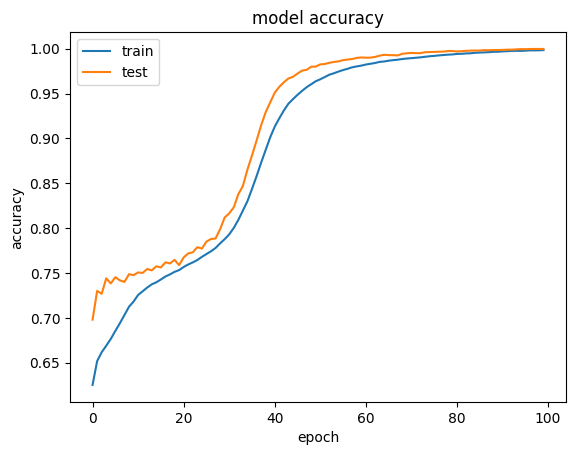

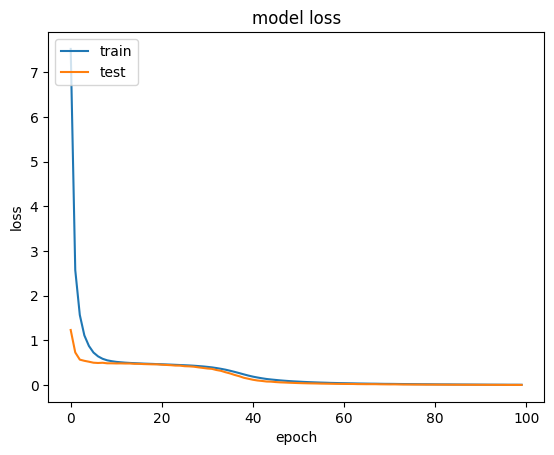

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
test_data = pd.read_csv('../../data/feature_sets/only_in_game_data_v1.csv')


In [20]:
test_pred = test_data.pop('red_team_outcome')


In [21]:
test_extra_info = test_data[columns_to_drop]
test_data.drop(columns=columns_to_drop,inplace=True)


In [22]:
random_rows = test_data.sample(n=5)

In [23]:
random_rows

,blue_team_total_gold,blue_team_inhibitors,blue_team_towers,blue_team_barons,blue_team_total_kills,blue_team_ocean_drakes,blue_team_cloud_drakes,blue_team_mountain_drakes,blue_team_chemtech_drakes,blue_team_infernal_drakes,...,blue_jungle_champ,blue_mid_champ,blue_bot_champ,blue_supp_champ,red_top_champ,red_jungle_champ,red_mid_champ,red_bot_champ,red_supp_champ,time_in_game
273472,15863,0,0,0,0,0,0,0,0,0,...,146,45,122,139,70,74,140,132,95,604.0
456772,47907,0,4,0,8,0,0,0,0,0,...,112,140,132,17,89,121,58,153,95,1680.0
424911,16091,0,0,0,3,0,0,0,0,0,...,83,23,153,112,105,158,58,174,4,599.0
84674,24496,0,0,0,1,0,0,1,1,0,...,83,169,54,109,70,121,140,130,9,900.0
132675,35478,0,1,0,1,0,0,0,0,1,...,112,23,164,109,0,159,96,122,103,1384.0


In [24]:
random_rows['index'] = random_rows.index

C:\Users\joshu_rdnqgbx\AppData\Local\Temp\ipykernel_2688\1653804312.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  random_rows['index'] = random_rows.index


In [25]:
test_extra_info.iloc[354393]

riot_match_id                111560983140247875
min_start_time        2024-01-22 16:00:00+00:00
patch_version                               545
blue_team_id                               2173
blue_top_player              105514974275992586
blue_jungle_player           107464179845128878
blue_mid_player               98926509846377469
blue_bot_player              104737951126648199
blue_supp_player             101389760981745081
red_team_id                                2349
red_top_player               105515229738531937
red_jungle_player            105830645287286396
red_mid_player               105554437688383476
red_bot_player               105501834624360050
red_supp_player              102787200059605684
league                                        2
format                                        0
game_in_format                                1
season_format                                 1
month                                         1
day                                     

In [26]:
test_pred.iloc[int(354393.0)]

1

In [27]:
random_rows_predictions = []
for i in range(len(random_rows)):
    print(test_pred.iloc[int(random_rows.iloc[i]['index'])])

0
0
1
0
1


In [28]:
random_rows.drop(columns = 'index',inplace = True)

In [29]:
random_rows_results = model.predict(random_rows)

1/1 [==============================] - 0s 100ms/step


In [30]:
random_rows_results

array([[1.4219816e-10],
       [6.2029602e-13],
       [1.0000000e+00],
       [4.9118215e-10],
       [1.0000000e+00]], dtype=float32)

In [31]:
all_results = model.predict(test_data)

14283/14283 [==============================] - 48s 3ms/step


In [32]:
threshold_results = []
for result in all_results:
    threshold_results.append(int(result))

C:\Users\joshu_rdnqgbx\AppData\Local\Temp\ipykernel_2688\2213938060.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  threshold_results.append(int(result))


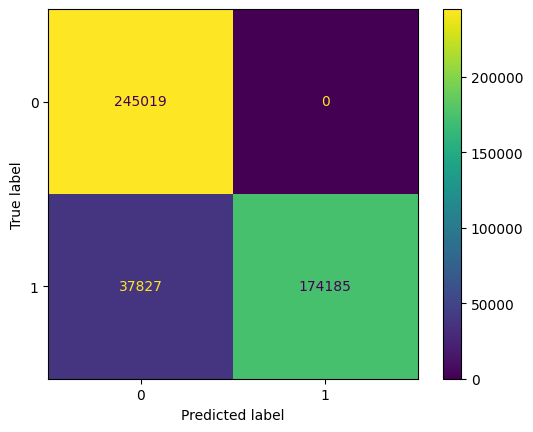

In [33]:
confusion_matrix = metrics.confusion_matrix(test_pred, threshold_results)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

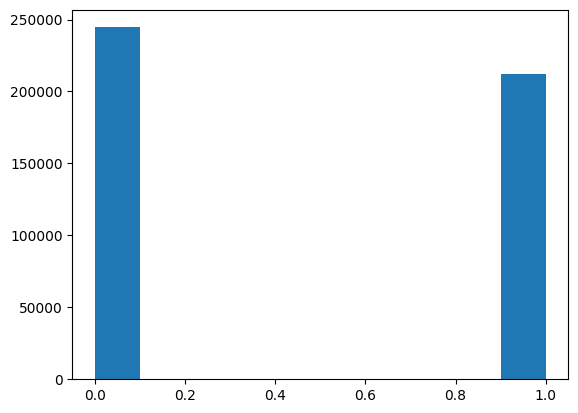

In [34]:
plt.hist(all_results)
plt.show() 

In [35]:
metrics.precision_score(test_pred, threshold_results)


1.0

In [36]:
metrics.recall_score(test_pred, threshold_results)


0.8215808539139294

In [37]:
model.save_weights('../saved_models/only_in_game_data_v1.keras')